# Plot Compound Years for CESM

You need to run cesmIndeces.ipnyb first

In [1]:
#import my functions
import sys
sys.path.append('../')

#import my functions
import utils._modelDefinitions as _model
import utils._indexDefinitions as _index
import utils.overlapBins as overlapBins

In [2]:
import xarray
import matplotlib.pyplot as plt
import numpy
import pandas
import scipy.stats

%matplotlib inline

In [3]:
%run utils/emergence.ipynb

In [4]:
#The data
firePos=xarray.open_dataset('results/cesmFirePos.nc').sel(experiment=_model.cesmNoRepeats,drop=True)
fireNeg=xarray.open_dataset('results/cesmFireNeg.nc').sel(experiment=_model.cesmNoRepeats,drop=True)

In [5]:
firePos

<xarray.Dataset>
Dimensions:                (compound: 9, experiment: 13, year: 1250)
Coordinates:
  * year                   (year) int64 850 851 852 853 ... 2096 2097 2098 2099
  * experiment             (experiment) object 'LME.002' 'LME.003' ... '013'
  * compound               (compound) object 'nEvents' 'all3' ... 'anyCompound'
Data variables:
    nino34EastioSamwinter  (compound, experiment, year) float64 ...
    nino34EastioSamsummer  (compound, experiment, year) float64 ...
    nino34DmiSamwinter     (compound, experiment, year) float64 ...
    nino34DmiSamsummer     (compound, experiment, year) float64 ...
Attributes:
    indexNames:  ['nino34', 'eastIO', 'samWinter']
    indeces:     ['enso', 'iod', 'sam']
    pairs:       ['enso+iod', 'enso+sam', 'iod+sam']
    others:      ['all3', 'anyCompound', 'nEvents']

# Time of emergence?

Function to calcuate 95% CI from pre-1850 results, and plot against all data.

    Confidence Interval	Z

    90%	1.645

    95%	1.960

In [50]:
rollingFirePos=firePos.sel(
    experiment=_model.cesmNoRepeats, 
    drop=True
).rolling(year=30,min_periods=15,center=True).sum('year')

In [37]:
indexSet='nino34DmiSam'

Plot of trends in individual indices - Fire Promoting

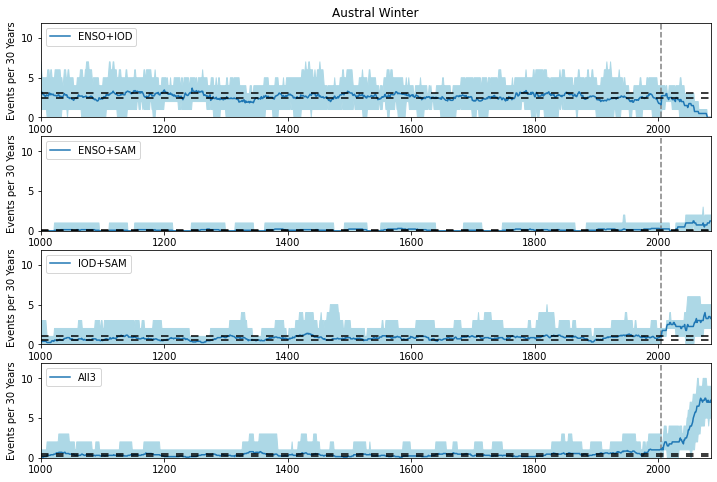

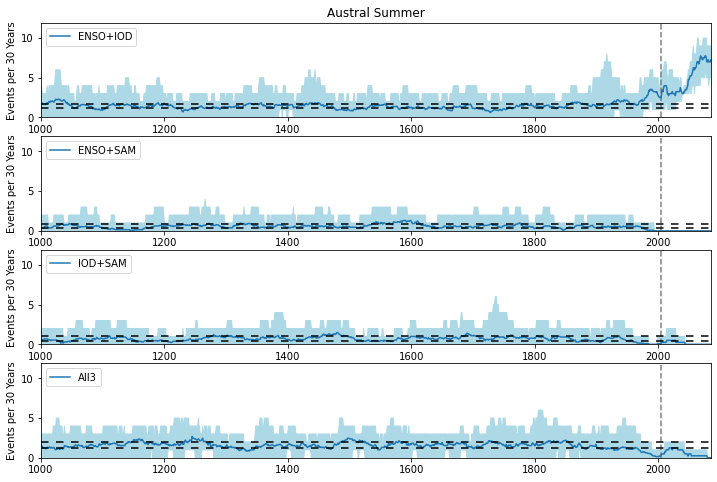

In [83]:
for iSeason in ['winter','summer']:
    plotData=rollingFirePos[indexSet+iSeason].sel(compound=[*firePos.pairs,'all3']).to_dataset('compound')
    ax=emergePlot(
        plotData,
        plotData.sel(year=slice(850,1850), drop=True)
    )
    
    for axx in ax:
        plt.sca(axx)
        plt.xlim([1000,2085])
        plt.ylim([0,11.9])
        plt.vlines(2005,0,20,color='grey',linestyles='dashed')

    
    ax[0].set_title('Austral '+iSeason.capitalize())
    
    ax[0].legend(['ENSO+IOD'], loc='upper left')
    ax[1].legend(['ENSO+SAM'], loc='upper left')
    ax[2].legend(['IOD+SAM'], loc='upper left')
    ax[3].legend(['All3'], loc='upper left')


    plt.savefig('figures/cesmDry'+iSeason.capitalize()+'CompoundEmergence.pdf')
    
    plt.show()

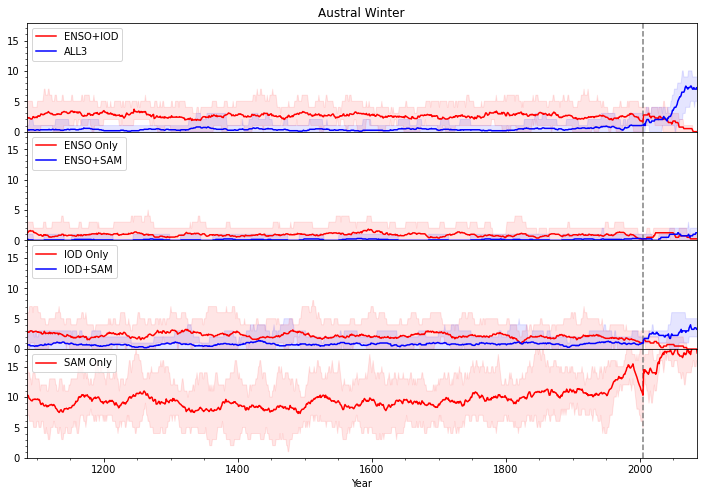

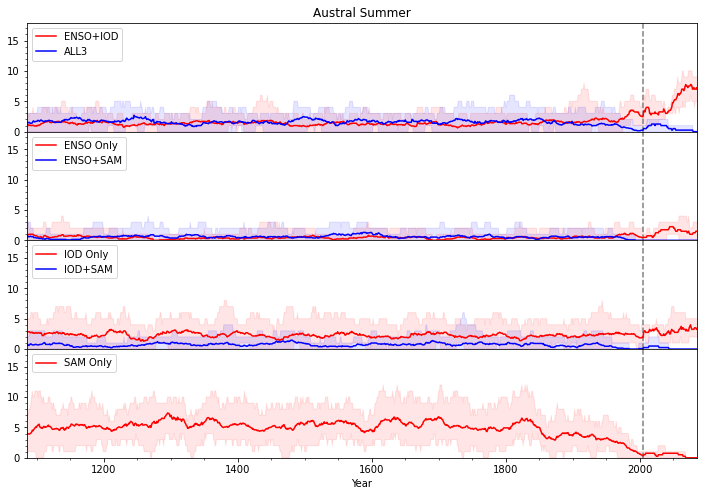

In [71]:
for iSeason in ['winter','summer']:
    plt.figure(figsize=(12,8))
    axx=list()
    iPlot=1
    for indexPair in [
        ['enso+iod','all3'],
        ['enso','enso+sam'],
        ['iod','iod+sam'],
        ['sam']
    ]:
        axx.append(plt.subplot(4,1,iPlot))
        overlaidEmergePlot(
            rollingFirePos[indexSet+iSeason].sel(
                compound=indexPair
            ).to_dataset('compound')
        )
        plt.vlines(2005,0,20,color='grey',linestyles='dashed')
        plt.ylabel('')
        plt.xlim([1085,2085])
        plt.ylim([0,17.9])
        iPlot=iPlot+1

    plt.subplots_adjust(hspace=0)
    axx[0].set_title('Austral '+iSeason.capitalize())

    [ax.set_xticklabels([]) for ax in axx[:-1]]

    axx[0].legend(['ENSO+IOD','ALL3'], loc='upper left')
    axx[1].legend(['ENSO Only','ENSO+SAM'], loc='upper left')
    axx[2].legend(['IOD Only','IOD+SAM'], loc='upper left')
    axx[3].legend(['SAM Only'], loc='upper left')



In [72]:
rollingFireNeg=fireNeg.sel(
    experiment=_model.cesmNoRepeats, 
    drop=True
).rolling(year=30,min_periods=15,center=True).sum('year')

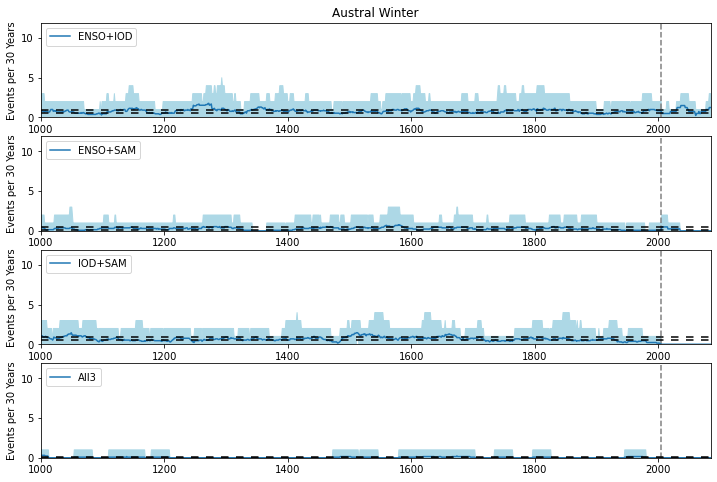

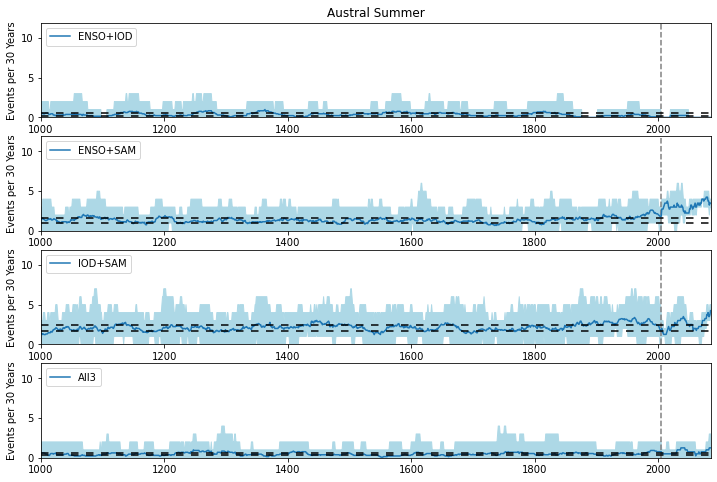

In [84]:
for iSeason in ['winter','summer']:
    plotData=rollingFireNeg[indexSet+iSeason].sel(compound=[*firePos.pairs,'all3']).to_dataset('compound')
    ax=emergePlot(
        plotData,
        plotData.sel(year=slice(850,1850), drop=True)
    )
    
    for axx in ax:
        plt.sca(axx)
        plt.xlim([1000,2085])
        plt.ylim([0,11.9])
        plt.vlines(2005,0,20,color='grey',linestyles='dashed')

    
    ax[0].set_title('Austral '+iSeason.capitalize())
    
    ax[0].legend(['ENSO+IOD'], loc='upper left')
    ax[1].legend(['ENSO+SAM'], loc='upper left')
    ax[2].legend(['IOD+SAM'], loc='upper left')
    ax[3].legend(['All3'], loc='upper left')


    plt.savefig('figures/cesmWet'+iSeason.capitalize()+'CompoundEmergence.pdf')
    
    plt.show()

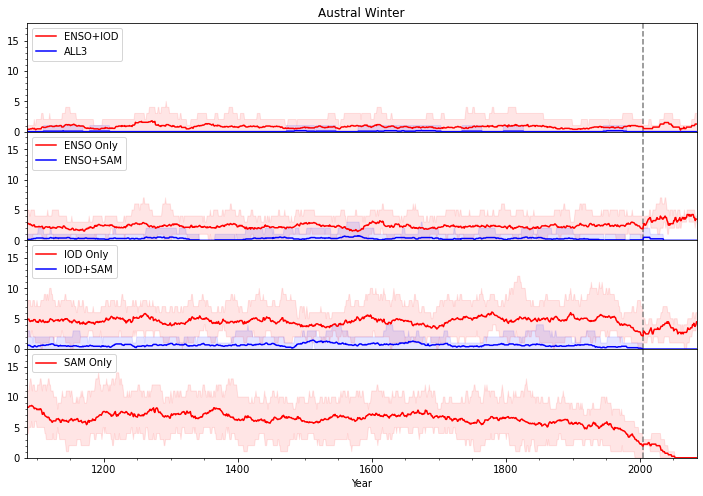

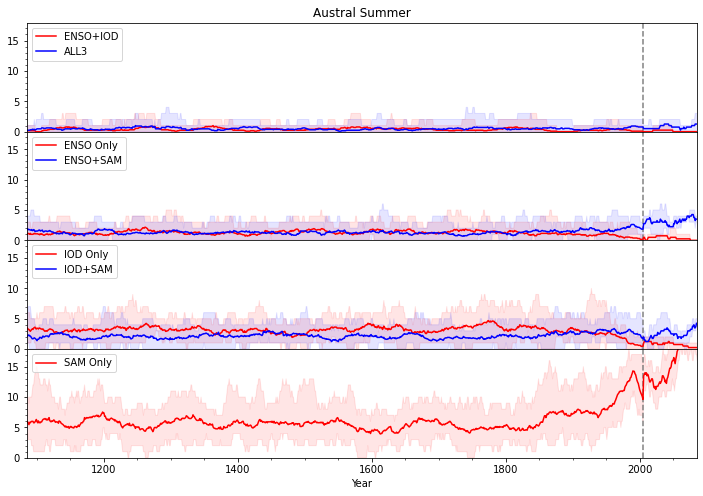

In [73]:
for iSeason in ['winter','summer']:
    plt.figure(figsize=(12,8))
    axx=list()
    iPlot=1
    for indexPair in [
        ['enso+iod','all3'],
        ['enso','enso+sam'],
        ['iod','iod+sam'],
        ['sam']
    ]:
        axx.append(plt.subplot(4,1,iPlot))
        overlaidEmergePlot(
            rollingFireNeg[indexSet+iSeason].sel(
                compound=indexPair
            ).to_dataset('compound')
        )
        plt.vlines(2005,0,20,color='grey',linestyles='dashed')
        plt.ylabel('')
        plt.xlim([1085,2085])
        plt.ylim([0,17.9])
        iPlot=iPlot+1

    plt.subplots_adjust(hspace=0)
    axx[0].set_title('Austral '+iSeason.capitalize())

    [ax.set_xticklabels([]) for ax in axx[:-1]]

    axx[0].legend(['ENSO+IOD','ALL3'], loc='upper left')
    axx[1].legend(['ENSO Only','ENSO+SAM'], loc='upper left')
    axx[2].legend(['IOD Only','IOD+SAM'], loc='upper left')
    axx[3].legend(['SAM Only'], loc='upper left')



# emergence plot using east IO

In [ ]:
overBinEFirePos=overlapBins.binSum(
    xarray.open_dataset('results/cesmEFirePos.nc').sel(experiment=_model.cesmNoRepeats)
)

overBinComparison = xarray.merge([
    overBinFirePos.dmi,
    overBinEFirePos.eastIO,
    overBinFirePos.nino34.rename('nino34NoDmi'),
    overBinEFirePos.nino34.rename('nino34NoEastIO'),
    overBinFirePos['nino34+dmi'],
    overBinEFirePos['nino34+eastIO']
])

emergePlot(
    overBinComparison, overBinComparison.where(overBinEFirePos.year<1850)
        )


In [ ]:
plt.figure()

overBinEFirePos.sel(experiment=_model.cesmNoRepeats).eastIO.mean('experiment').plot()
overBinFirePos.sel(experiment=_model.cesmNoRepeats).dmi.mean('experiment').plot()

In [ ]:
plt.figure()

overBinEFirePos['nino34+eastIO'].sel(experiment=_model.cesmNoRepeats).mean('experiment').plot()
overBinFirePos['nino34+dmi'].sel(experiment=_model.cesmNoRepeats).mean('experiment').plot()

In [ ]:
overBinEFireNeg=overlapBins.binSum(
    xarray.open_dataset('results/cesmEFireNeg.nc').sel(experiment=_model.cesmNoRepeats)
)

In [ ]:
plt.figure()

overBinEFireNeg.sel(experiment=_model.cesmNoRepeats).eastIO.mean('experiment').plot()
overBinFireNeg.sel(experiment=_model.cesmNoRepeats).dmi.mean('experiment').plot()

# In non-overlapping 30 year bins

Calculate non-overlapping 30 year bins, and sum the number of events in them

In [ ]:
firePos

In [ ]:
yearBins=numpy.arange(860, 2100, 30)

binMid=numpy.arange(875, 2086, 30)

#binnedFirePos=firePos.groupby_bins('year', yearBins, labels=binMid).sum() #This line is a bit problematic. If you have all nans in the bin, it will give you a sum of 0. It is probably more useful to return a nan

#Do the sum for each interval, but only it there are no Nans.
binnedFirePos=firePos.groupby_bins('year', yearBins, labels=binMid).map(
    lambda ds : ds.sum(dim='year').where(ds.isnull().any(dim='year')!=True)
)
binnedFirePos=binnedFirePos.rename({'year_bins':'year'})

binnedFirePos=binnedFirePos.assign_attrs({
        **firePos.attrs,
        'Bins':'Non-Overlapping 30 year bins, seperating by 10 year intervals', 
        'Year':'Midpoint of bin'
    })

In [ ]:
#check that years with no data are nan
binnedFirePos.sel(experiment='001')

In [ ]:
overlapBins.binPlot(binnedFirePos.sel(experiment=_model.cesmNoRepeats))

Group into three time periods: pre 1850, 1850-2005 and 2005 to 2100

In [ ]:
groupA = binnedFirePos.sel(experiment=_model.cesmNoRepeats, year=slice(850,1850))
groupB = binnedFirePos.sel(experiment=_model.cesmNoRepeats, year=slice(1850,2006))
groupC = binnedFirePos.sel(experiment=_model.cesmRcp85, year=slice(2006,2100))

In [ ]:
groupC.nino34.values.flatten()

In [ ]:
toPlot=[ #*firePos.attrs['indeces'],
        *firePos.attrs['pairs'],'all3']

In [ ]:
for iInd in toPlot:
    print(iInd)
    print(
        scipy.stats.f_oneway(
        groupA[iInd].values.flatten() , 
        groupB[iInd].values.flatten(), 
        groupC[iInd].values.flatten()
        )
    )

In [ ]:
for iInd in toPlot:
    print(iInd)
    print(
        scipy.stats.ttest_ind(groupA[iInd].values.flatten() , 
        groupB[iInd].values.flatten())
    )
    

In [ ]:
for iInd in toPlot:
    print(iInd)
    print(
        scipy.stats.ttest_ind(groupA[iInd].values.flatten() , 
        groupC[iInd].values.flatten())
    )
    

In [ ]:
def mySlowFunction(input):
    y=input[0]
    if y<1850:
        result='A'
    elif y<2006:
        result='B'
    else:
        result='C'
        
    return result

In [ ]:
binnedFirePos.sel(experiment=_model.cesmNoRepeats).nino34.to_dataframe().boxplot(by=mySlowFunction)


# In overlapping 30 year bins

In [ ]:
overBinFirePos = overlapBins.binSum(firePos)
overBinFireNeg = overlapBins.binSum(fireNeg)

In [ ]:
print("Fire Promoting")
overlapBins.binPlot(overBinFirePos.sel(experiment=_model.cesmNoRepeats))
plt.xlim(1700,2100)
plt.show()


print("Not Fire Promoting")
overlapBins.binPlot(overBinFireNeg.sel(experiment=_model.cesmNoRepeats))
plt.xlim(1700,2100)
plt.show()